# Week 7 Quiz

In [12]:
import os
import cv2
import scipy
import skimage
import slgbuilder
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

Consider an image:

In [2]:
I = np.array([
    [7, 1, 2, 2, 4, 1],
    [6, 6, 5, 4, 5, 1],
    [5, 2, 6, 4, 4, 2],
    [1, 5, 7, 2, 2, 6],
    [2, 4, 3, 6, 7, 7]
])

Rows = z = f(x), Columns = x

## 1)
What is the cost of the line given by f(x) = 3?

In [3]:
np.sum(I[2])

23

## 2)
What is the cost of the min-cost solution constrained by ∆x = 0?

In [11]:
min_row = np.argmin(I.sum(axis=1))
min_cost = I[min_row].sum()

print(f'Minimum cost: {min_cost} for row: {min_row}')

Minimum cost: 17 for row: 0


## 3)
What is the cost of the min-cost solution constrained by ∆x = 2?

In [13]:
delta = 2 

layer = slgbuilder.GraphObject(I)
helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1

In [17]:
min_cost = I[segmentation_line, np.arange(segmentation.shape[1])].sum()
min_cost

11

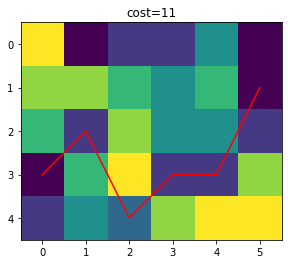

In [18]:
layer = slgbuilder.GraphObject(I)
helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=2, wrap=False)
helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1
c = (I[segmentation_line, np.arange(segmentation.shape[1])]).sum()

fig, ax = plt.subplots()
ax.imshow(I)
ax.plot(segmentation_line, 'r')
ax.set_title(f'cost={c}')
plt.show()